In [1]:
from Qlearning import QAgent,StepWrapper
from TestEnv import HydroElectric_Test
import matplotlib.pyplot as plt
import numpy as np 
import random

In [2]:
seed = 4
np.random.seed(seed)
random.seed(seed)
log = []

In [3]:
env = HydroElectric_Test("validate.xlsx")
env.reset(seed=seed)
# env.discrete_action_space.seed(seed)
env_wrapped = StepWrapper(env, step_hours=1)
agent = QAgent(env_wrapped)


# step_hours = 3 
# agent = QAgent(env)


In [4]:
env.reset()

(array([5.00e+04, 1.32e+01, 1.00e+00, 4.00e+00, 1.00e+00, 1.00e+00,
        2.01e+03]),
 {})

In [5]:
agent.train(
    simulations=10,
    learning_rate=0.1,
    adaptive_epsilon=True
)

0 5


In [6]:
water_levels, rewards = agent.play()

[5.00e+04 1.32e+01 1.00e+00 4.00e+00 1.00e+00 1.00e+00 2.01e+03]
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1

In [7]:
# agent.visualize_rewards()

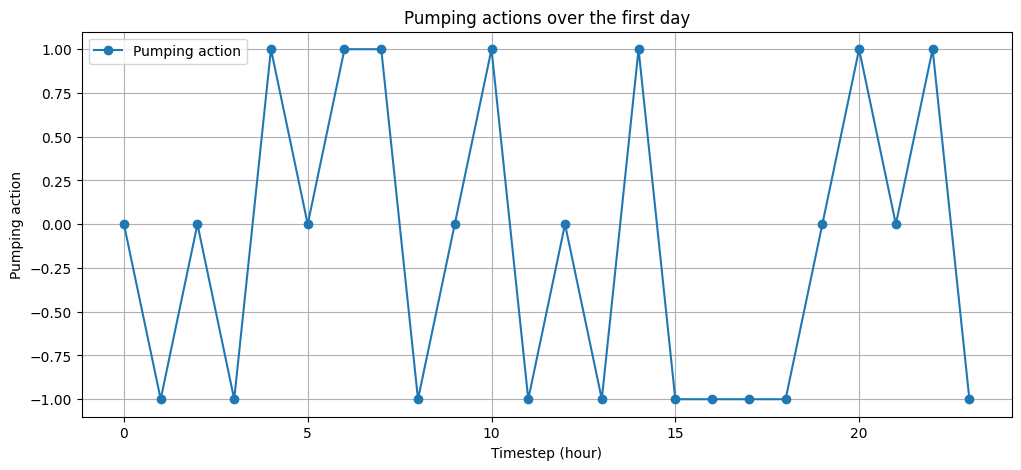

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# Zorg dat je water_levels al hebt van agent.play()
actions = agent.env.action_history[:24] # eerste 7 dagen, 24 uur per dag

plt.figure(figsize=(12,5))
plt.plot(actions, marker='o')
plt.title("Pumping actions over the first day")
plt.xlabel("Timestep (hour)")
plt.ylabel("Pumping action")
plt.legend(["Pumping action"])
plt.grid(True)
plt.show()

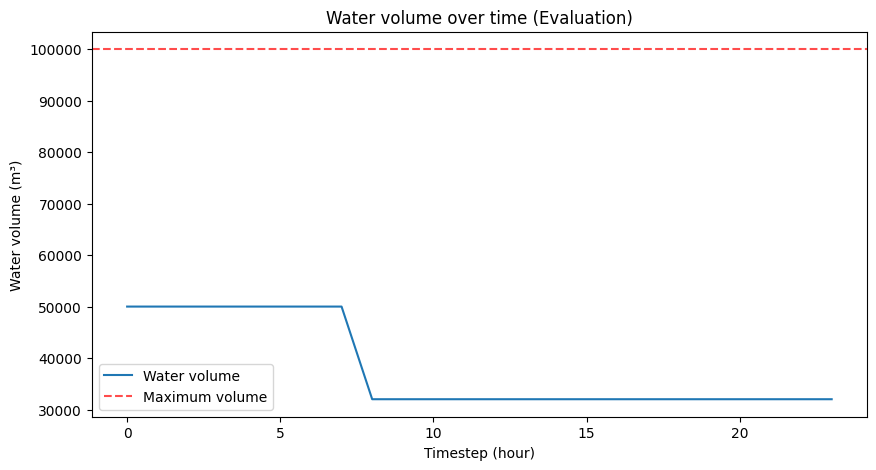

In [9]:
# Plot waterniveau over tijd
%matplotlib inline
plt.figure(figsize=(10,5))
plt.plot(water_levels[:24])  # eerste 7 dagen, 24 uur per dag
plt.axhline(env.max_volume, color='r', linestyle='--', alpha=0.7)
plt.title("Water volume over time (Evaluation)")
plt.xlabel("Timestep (hour)")
plt.ylabel("Water volume (m³)")
plt.legend(["Water volume", "Maximum volume"])
plt.show()


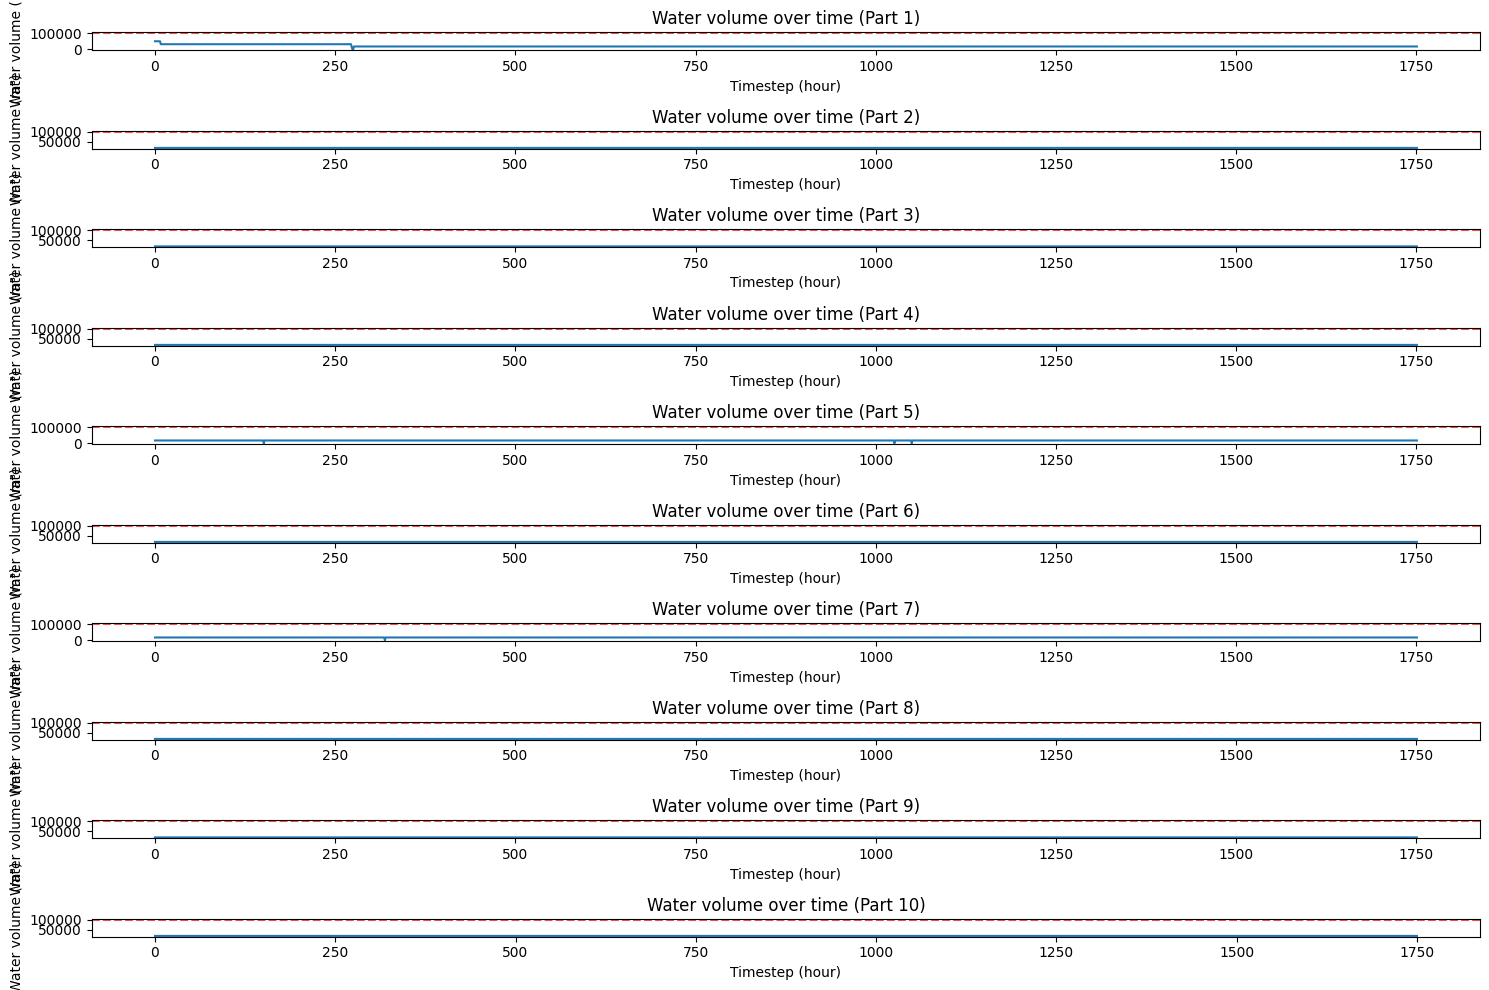

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Stel: water_levels bevat alle uren over 3 jaar
# en env.max_volume is de maximale waterhoeveelheid

# Aantal plots
n_plots = 10

# Verdeel de data in n_plots stukken
chunks = np.array_split(water_levels, n_plots)

plt.figure(figsize=(15,10))

for i, chunk in enumerate(chunks, 1):
    plt.subplot(n_plots, 1, i)
    plt.plot(chunk)
    plt.axhline(env.max_volume, color='r', linestyle='--', alpha=0.7)
    plt.title(f"Water volume over time (Part {i})")
    plt.xlabel("Timestep (hour)")
    plt.ylabel("Water volume (m³)")

plt.tight_layout()
plt.show()


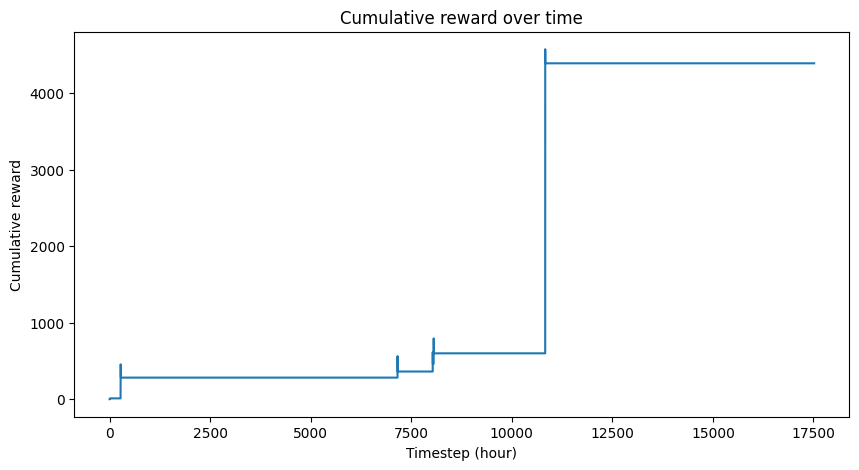

In [11]:
# Plot cumulatieve reward
%matplotlib inline
cumulative_rewards = np.cumsum(rewards)
plt.figure(figsize=(10,5))
plt.plot(cumulative_rewards)
plt.title("Cumulative reward over time")
plt.xlabel("Timestep (hour)")
plt.ylabel("Cumulative reward")
plt.show()

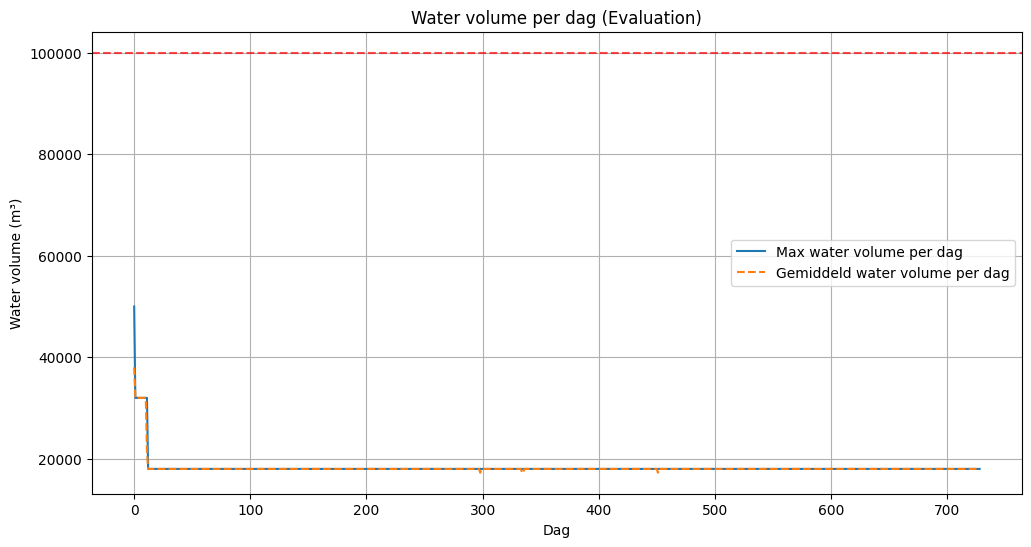

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Water levels per dag (max of gemiddeld)
hours_per_day = 24
num_days = len(water_levels) // hours_per_day

# Max waterniveau per dag
daily_max = [max(water_levels[i*hours_per_day:(i+1)*hours_per_day]) for i in range(num_days)]
# Gemiddeld waterniveau per dag
daily_avg = [np.mean(water_levels[i*hours_per_day:(i+1)*hours_per_day]) for i in range(num_days)]

plt.figure(figsize=(12,6))
plt.plot(daily_max, label='Max water volume per dag')
plt.plot(daily_avg, label='Gemiddeld water volume per dag', linestyle='--')
plt.axhline(env.max_volume, color='r', linestyle='--', alpha=0.7)
plt.title("Water volume per dag (Evaluation)")
plt.xlabel("Dag")
plt.ylabel("Water volume (m³)")
plt.legend()
plt.grid(True)
plt.show()


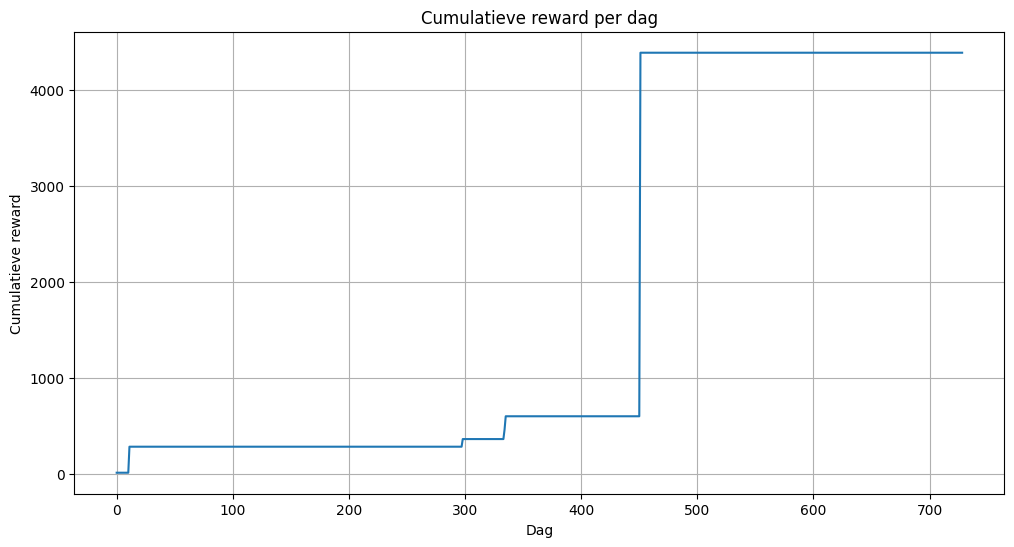

In [13]:
# Cumulatieve reward per dag
daily_rewards = [sum(rewards[i*hours_per_day:(i+1)*hours_per_day]) for i in range(num_days)]
cumulative_daily_rewards = np.cumsum(daily_rewards)

plt.figure(figsize=(12,6))
plt.plot(cumulative_daily_rewards)
plt.title("Cumulatieve reward per dag")
plt.xlabel("Dag")
plt.ylabel("Cumulatieve reward")
plt.grid(True)
plt.show()


Waarschuwing: aantal uren niet deelbaar door 24, laatste incomplete dag wordt genegeerd


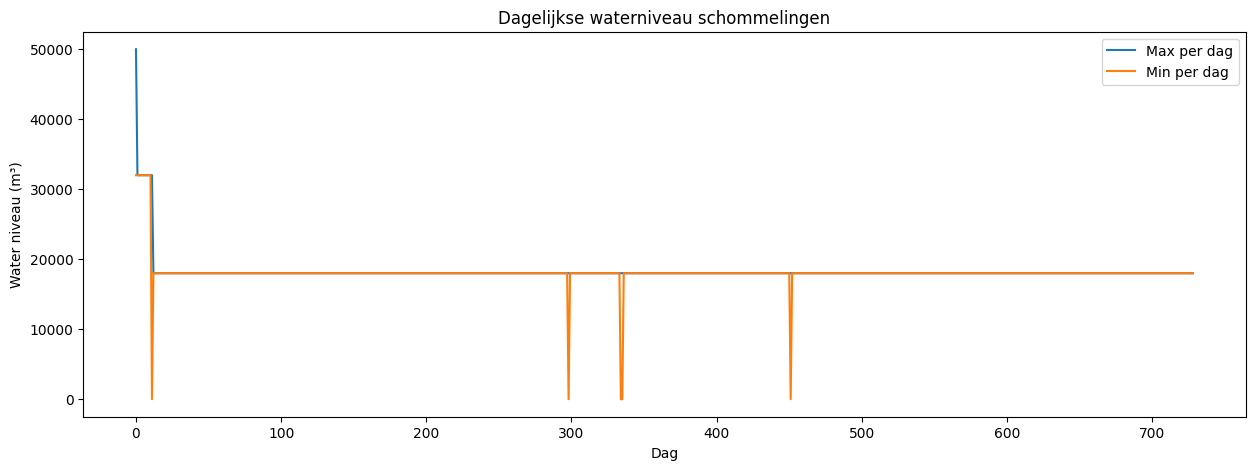

In [14]:
import numpy as np

water_levels = np.array(water_levels)  # zet om naar NumPy array

# Controleer of het aantal uren deelbaar is door 24
if len(water_levels) % 24 != 0:
    print("Waarschuwing: aantal uren niet deelbaar door 24, laatste incomplete dag wordt genegeerd")
    water_levels = water_levels[:-(len(water_levels) % 24)]

# Bereken max en min per dag
daily_max = water_levels.reshape(-1, 24).max(axis=1)
daily_min = water_levels.reshape(-1, 24).min(axis=1)

# Plotten
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(daily_max, label="Max per dag")
plt.plot(daily_min, label="Min per dag")
plt.legend()
plt.title("Dagelijkse waterniveau schommelingen")
plt.xlabel("Dag")
plt.ylabel("Water niveau (m³)")
plt.show()


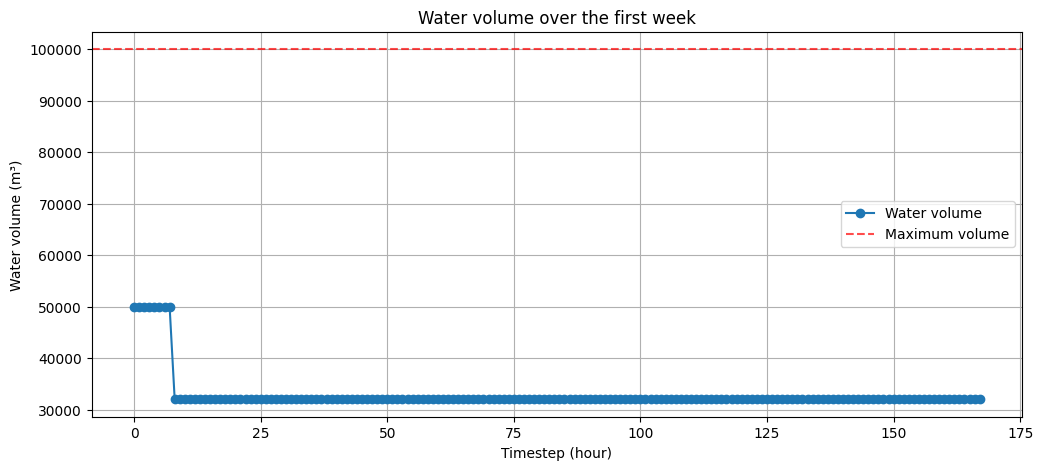

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

# Zorg dat je water_levels al hebt van agent.play()
first_week = water_levels[:24*7]  # eerste 7 dagen, 24 uur per dag

plt.figure(figsize=(12,5))
plt.plot(first_week, marker='o')
plt.title("Water volume over the first week")
plt.xlabel("Timestep (hour)")
plt.ylabel("Water volume (m³)")
plt.axhline(env.max_volume, color='r', linestyle='--', alpha=0.7, label="Max volume")
plt.legend(["Water volume", "Maximum volume"])
plt.grid(True)
plt.show()


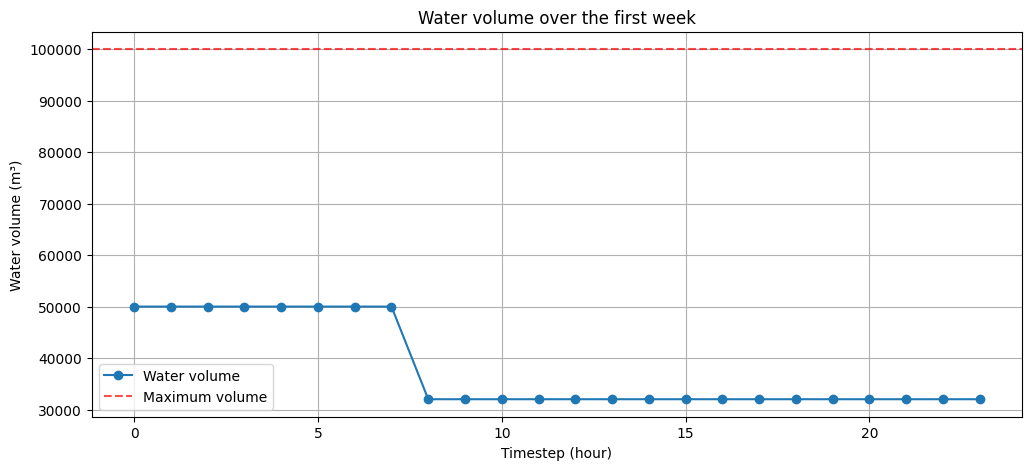

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

# Zorg dat je water_levels al hebt van agent.play()
first_week = water_levels[:24]  # eerste 7 dagen, 24 uur per dag

plt.figure(figsize=(12,5))
plt.plot(first_week, marker='o')
plt.title("Water volume over the first week")
plt.xlabel("Timestep (hour)")
plt.ylabel("Water volume (m³)")
plt.axhline(env.max_volume, color='r', linestyle='--', alpha=0.7, label="Max volume")
plt.legend(["Water volume", "Maximum volume"])
plt.grid(True)
plt.show()